In [23]:
import pymc3 as pm
import pickle
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import warnings
import random
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
with open('datasets/monster_hp_cr.pickle', 'rb') as handle:
    monster_hp_cr = pickle.load(handle)

In [3]:
sorted_hp_cr_dup = sorted(monster_hp_cr.values(), key=lambda x : x[0])

# We remove duplicate HPs to simplify the following visualizations
seen_hp = set()
sorted_hp_cr = []
for hp_cr in sorted_hp_cr_dup:
    if hp_cr[0] not in seen_hp:
        sorted_hp_cr.append(hp_cr)
        seen_hp.add(hp_cr[0])

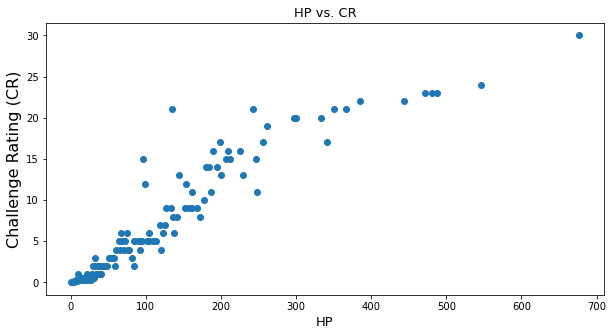

In [4]:
# A numpy array in which have one row per monster and two columns, health points and challenge rating
sorted_hp_cr = np.array(sorted_hp_cr)

fig = plt.figure(figsize=(10, 5))
plt.scatter(sorted_hp_cr[:, 0], sorted_hp_cr[:, 1])
plt.xlabel("HP", fontsize=13)
plt.ylabel("Challenge Rating (CR)", fontsize=16)
plt.title("HP vs. CR", fontsize=13)
plt.show()

## Linear Regression

In [26]:
random_monsters = random.sample(range(len(sorted_hp_cr)), 10)

x = sorted_hp_cr[[random_monsters], 0]  # Our known feature (hp)
y = sorted_hp_cr[[random_monsters], 1]  # THe challenge rating we to regress

with pm.Model() as linear_model:
    
    beta = pm.Normal('beta', mu=0, sigma=50, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=50)
    
    mu = beta[0] + beta[1] * x
    
    cr = pm.Normal('cr', mu=mu, sigma=sigma, observed=y)
    
    linear_trace = pm.sample(1000, tune=2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta]
Sampling 2 chains, 0 divergences: 100%|██████████| 6000/6000 [00:05<00:00, 1155.87draws/s]


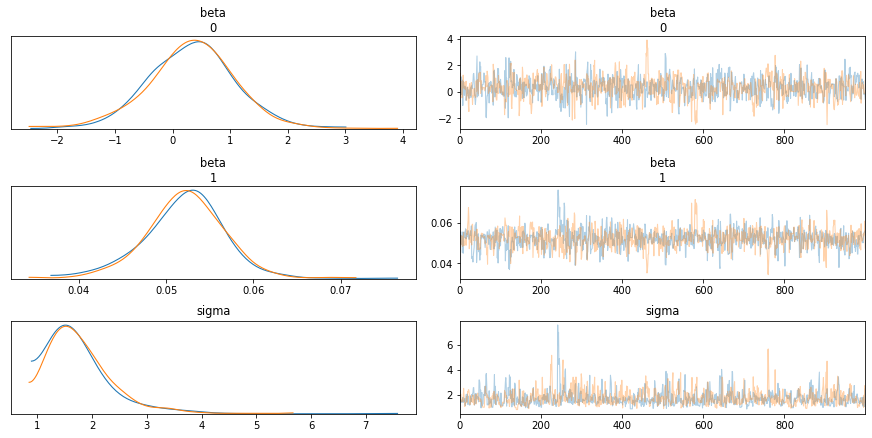

In [27]:
with pm.Model() as linear_model:
    k = az.plot_trace(linear_trace)